In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

   Data  Quarterly Time Series of the Number of Australian Residents
    https://vincentarelbundock.github.io/Rdatasets/csv/datasets/austres.csv 

In [2]:
df=pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/austres.csv ")

In [3]:
df=df.drop('Unnamed: 0',1)

In [4]:
df.head()

,time,austres
0,1971.25,13067.3
1,1971.50,13130.5
2,1971.75,13198.4
3,1972.00,13254.2
4,1972.25,13303.7


In [5]:
df.tail()

,time,austres
84,1992.25,17482.6
85,1992.50,17526.0
86,1992.75,17568.7
87,1993.00,17627.1
88,1993.25,17661.5


In [6]:
len(df)

89

In [7]:
df.shape[0]

89

In [8]:
start = datetime.datetime.strptime("1971-03-31", "%Y-%m-%d")
print(start)

1971-03-31 00:00:00


In [9]:
#!pip install arrow

In [10]:
start = datetime.datetime.strptime("1971-03-31", "%Y-%m-%d")
print(start)

1971-03-31 00:00:00


In [16]:
date_list = [start + relativedelta(months=x) for x in range(0,3*df.shape[0])]

In [17]:
date_list

[datetime.datetime(1971, 3, 31, 0, 0),
 datetime.datetime(1971, 4, 30, 0, 0),
 datetime.datetime(1971, 5, 31, 0, 0),
 datetime.datetime(1971, 6, 30, 0, 0),
 datetime.datetime(1971, 7, 31, 0, 0),
 datetime.datetime(1971, 8, 31, 0, 0),
 datetime.datetime(1971, 9, 30, 0, 0),
 datetime.datetime(1971, 10, 31, 0, 0),
 datetime.datetime(1971, 11, 30, 0, 0),
 datetime.datetime(1971, 12, 31, 0, 0),
 datetime.datetime(1972, 1, 31, 0, 0),
 datetime.datetime(1972, 2, 29, 0, 0),
 datetime.datetime(1972, 3, 31, 0, 0),
 datetime.datetime(1972, 4, 30, 0, 0),
 datetime.datetime(1972, 5, 31, 0, 0),
 datetime.datetime(1972, 6, 30, 0, 0),
 datetime.datetime(1972, 7, 31, 0, 0),
 datetime.datetime(1972, 8, 31, 0, 0),
 datetime.datetime(1972, 9, 30, 0, 0),
 datetime.datetime(1972, 10, 31, 0, 0),
 datetime.datetime(1972, 11, 30, 0, 0),
 datetime.datetime(1972, 12, 31, 0, 0),
 datetime.datetime(1973, 1, 31, 0, 0),
 datetime.datetime(1973, 2, 28, 0, 0),
 datetime.datetime(1973, 3, 31, 0, 0),
 datetime.datetime(

In [18]:
len(date_list)

267

In [19]:
c2=[]
for i in range(0,3*len(df),3):
    c2.append(date_list[i])

In [20]:
c2

[datetime.datetime(1971, 3, 31, 0, 0),
 datetime.datetime(1971, 6, 30, 0, 0),
 datetime.datetime(1971, 9, 30, 0, 0),
 datetime.datetime(1971, 12, 31, 0, 0),
 datetime.datetime(1972, 3, 31, 0, 0),
 datetime.datetime(1972, 6, 30, 0, 0),
 datetime.datetime(1972, 9, 30, 0, 0),
 datetime.datetime(1972, 12, 31, 0, 0),
 datetime.datetime(1973, 3, 31, 0, 0),
 datetime.datetime(1973, 6, 30, 0, 0),
 datetime.datetime(1973, 9, 30, 0, 0),
 datetime.datetime(1973, 12, 31, 0, 0),
 datetime.datetime(1974, 3, 31, 0, 0),
 datetime.datetime(1974, 6, 30, 0, 0),
 datetime.datetime(1974, 9, 30, 0, 0),
 datetime.datetime(1974, 12, 31, 0, 0),
 datetime.datetime(1975, 3, 31, 0, 0),
 datetime.datetime(1975, 6, 30, 0, 0),
 datetime.datetime(1975, 9, 30, 0, 0),
 datetime.datetime(1975, 12, 31, 0, 0),
 datetime.datetime(1976, 3, 31, 0, 0),
 datetime.datetime(1976, 6, 30, 0, 0),
 datetime.datetime(1976, 9, 30, 0, 0),
 datetime.datetime(1976, 12, 31, 0, 0),
 datetime.datetime(1977, 3, 31, 0, 0),
 datetime.datetime(

In [21]:
len(c2)

89

In [22]:
df['index'] =c2
df.set_index(['index'], inplace=True)
df.index.name=None

In [23]:
df.head()

,time,austres
1971-03-31,1971.25,13067.3
1971-06-30,1971.50,13130.5
1971-09-30,1971.75,13198.4
1971-12-31,1972.00,13254.2
1972-03-31,1972.25,13303.7


In [24]:
df=df.drop('time',1)

In [25]:
df.tail()

,austres
1992-03-31,17482.6
1992-06-30,17526.0
1992-09-30,17568.7
1992-12-31,17627.1
1993-03-31,17661.5


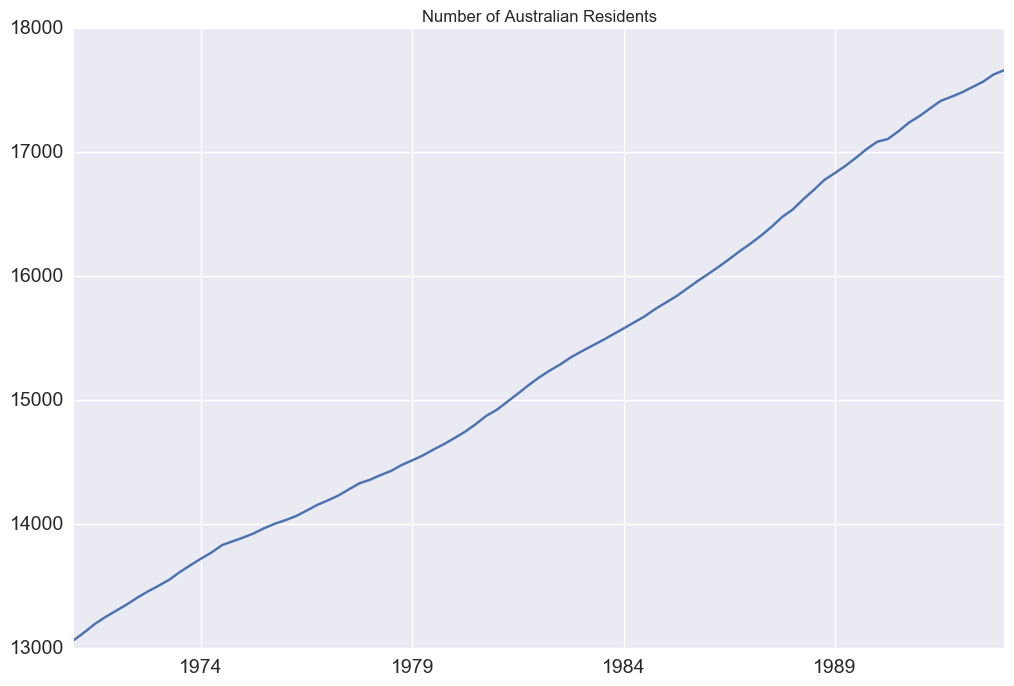

In [26]:
df.austres.plot(figsize=(12,8), title= 'Number of Australian Residents', fontsize=14)
plt.savefig('austrailian_residents.png', bbox_inches='tight')

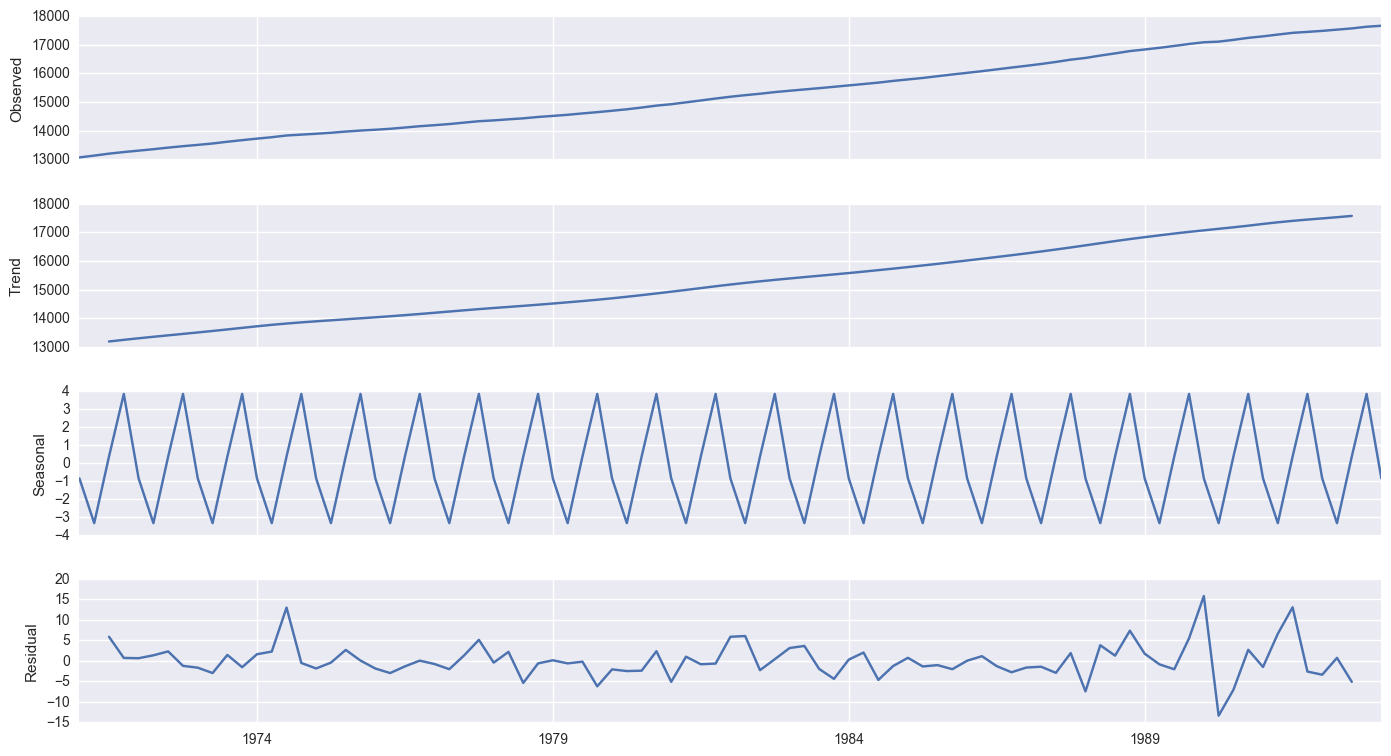

In [27]:
decomposition = seasonal_decompose(df.austres, freq=4)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [28]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
print(p)

range(0, 2)


In [29]:
import itertools
import warnings


In [30]:
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [31]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [32]:
y=df

In [39]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
c4=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1640.498695405866
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:957.7157324475122
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:901.8737542488778
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:893.4970589310027
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:821.5535708474058
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:789.9330545732091
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1866.0471769096082
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3925.760426368583
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1086.733456078065
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:917.9195061799221
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:808.5017824725799
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1543.673635439925
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:742.4302886984069
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:722.8237967086055
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:751.9874335168838
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:518.4115822594365
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:642.4135683750286
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:618.5002080638922
ARIMA(0, 

In [40]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
c3=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            c3.append( results.aic)
        except:
            continue

In [41]:
c3

[1640.4986954058661,
 957.71573244751221,
 901.87375424887784,
 893.4970589310027,
 821.55357084740581,
 789.93305457320912,
 1866.0471769096082,
 3925.760426368583,
 1086.733456078065,
 917.91950617992211,
 808.50178247257986,
 1543.673635439925,
 742.43028869840691,
 722.82379670860553,
 751.98743351688381,
 518.4115822594365,
 642.4135683750286,
 618.50020806389216,
 531.38051643921392,
 523.48167503075365,
 840.87355439369594,
 682.12788229642797,
 603.90993074768664,
 495.84228639190968,
 617.59430054426139,
 591.2669779528502,
 513.49418801156492,
 499.32742555121882,
 693.36936463628911,
 602.5140387938435,
 645.00191665951104,
 547.3449848000671,
 602.45564704084461,
 624.56385597318842,
 531.27831343560479,
 533.55468590383157,
 666.27776765833471,
 580.98178505458884,
 612.61949036919236,
 521.68920132707319,
 587.60903243331552,
 591.71459433261055,
 528.26901488150293,
 522.79352219688167,
 672.92567709976049,
 585.91491987589393,
 583.45887689915185,
 488.78715262100093,
 

In [43]:
len(c3)

60

In [44]:
import numpy as np
index_min = np.argmin(c3)

In [45]:
index_min

55

In [46]:
c4[index_min]

'ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:477.45261483171817'

In [47]:
type(c4[index_min])

str

In [ ]:
from statsmodels.tsa.x13 import x13_arima_select_order


In [74]:
order1=c4[index_min][6:13]
order1

'1, 1, 1'

In [75]:
type(order1)

str

In [77]:
order1=[int(s) for s in order1.split(',')]
order1

[1, 1, 1]

In [78]:
type(order1)

list

In [81]:
seasonal_order1=c4[index_min][16:27]
seasonal_order1

'0, 1, 1, 12'

In [82]:
seasonal_order1=[int(s) for s in seasonal_order1.split(',')]
seasonal_order1

[0, 1, 1, 12]

In [83]:
mod = sm.tsa.statespace.SARIMAX(df.austres, trend='n', order=order1, seasonal_order=seasonal_order1)

In [84]:
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            austres   No. Observations:                   89
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -283.908
Date:                            Tue, 23 May 2017   AIC                            575.816
Time:                                    23:27:35   BIC                            585.771
Sample:                                03-31-1971   HQIC                           579.829
                                     - 03-31-1993                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9163      0.066     13.797      0.000       0.786       1.047
ma.L1         -0.4557      0.139   

In [85]:
results.predict(start=78,end=99)

1990-09-30    17154.504726
1990-12-31    17232.721671
1991-03-31    17292.787820
1991-06-30    17356.532926
1991-09-30    17416.677379
1991-12-31    17478.884490
1992-03-31    17483.140550
1992-06-30    17521.456437
1992-09-30    17573.650282
1992-12-31    17618.031624
1993-03-31    17673.833098
1993-06-30    17686.742802
1993-09-30    17735.686265
1993-12-31    17793.317610
1994-03-31    17836.466110
1994-06-30    17890.975226
1994-09-30    17944.622703
1994-12-31    17986.865712
1995-03-31    18023.737569
1995-06-30    18066.224321
1995-09-30    18111.537395
1995-12-31    18166.767228
Freq: Q-DEC, dtype: float64

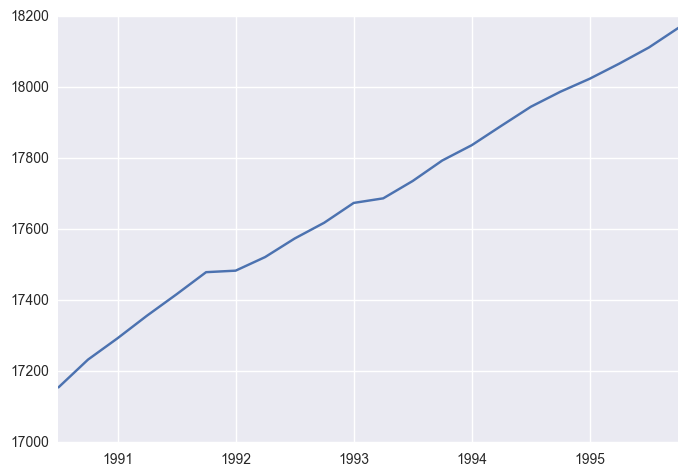

In [86]:
results.predict(start=78,end=99).plot()